In [137]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.dates as mdates
from datetime import timedelta

In [138]:
df = pd.read_csv('solidosmallas_202310312116.csv', index_col='fecha', parse_dates=True).drop(['id','turno'],axis=1)
df = df.sort_index()

<Axes: >

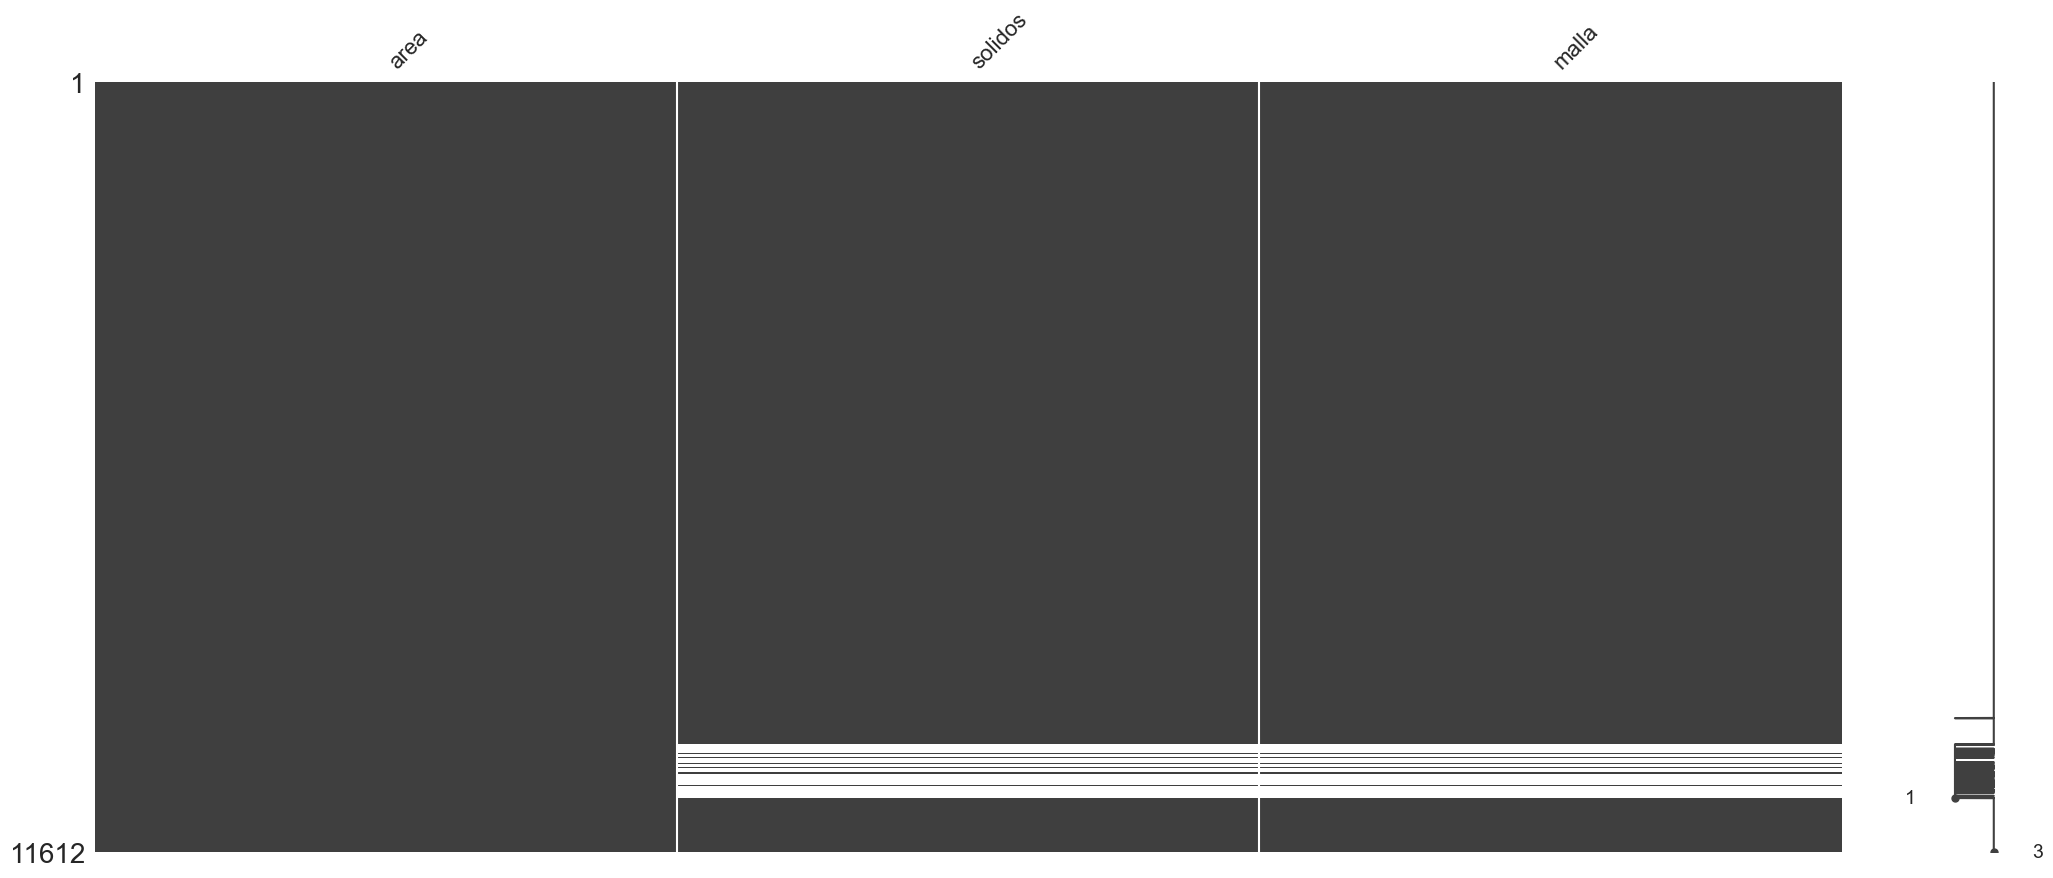

In [139]:
msno.matrix(df)

In [140]:
# Separación A0 A1 A2

df_a2 = df.loc[df['area'] == 'A2'].drop('area',axis=1)
df_a1 = df.loc[df['area'] == 'A1'].drop('area',axis=1)
df_a0 = df.loc[df['area'] == 'A0'].drop('area',axis=1)

df_a2.columns = ['solidos_a2', 'malla_a2']
df_a1.columns = ['solidos_a1', 'malla_a1']
df_a0.columns = ['solidos_a0', 'malla_a0']


<Axes: xlabel='fecha', ylabel='solidos'>

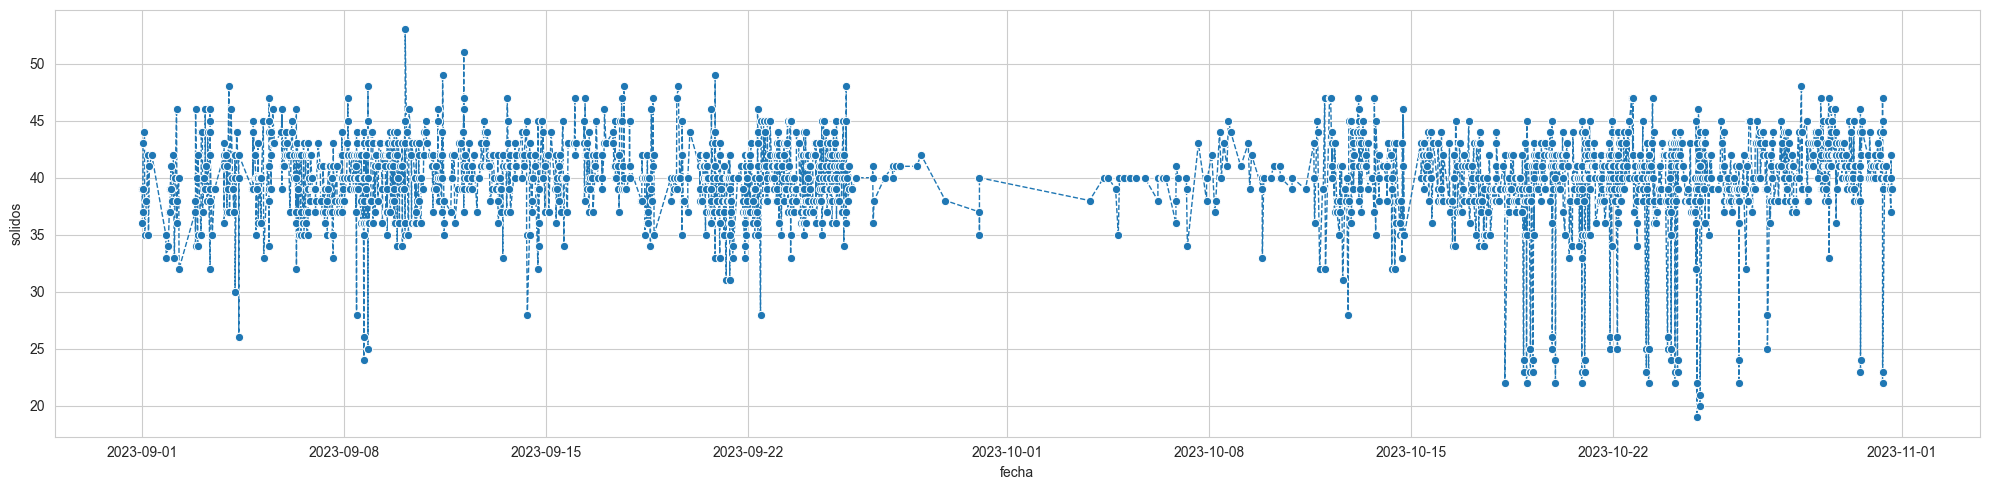

In [141]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,5),tight_layout=True)
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1])
sns.lineplot(df.loc['2023-09':'2023-10','solidos'], marker = 'o',lw=1, ls='--')

In [142]:
df_sm = pd.read_csv("Solidos_Mallas.csv", index_col = 0 , parse_dates=True).drop(['id','turno'],axis=1)

In [143]:
df_sm_a2 = df_sm.loc[df_sm['area'] == 'A2'].drop('area',axis=1)
df_sm_a1 = df_sm.loc[df_sm['area'] == 'A1'].drop('area',axis=1)
df_sm_a0 = df_sm.loc[df_sm['area'] == 'A0'].drop('area',axis=1)

df_sm_a2.columns = ['solidos_a2', 'malla_a2']
df_sm_a1.columns = ['solidos_a1', 'malla_a1']
df_sm_a0.columns = ['solidos_a0', 'malla_a0']

# ANALISIS A2

In [144]:
df_sm_a2

solidos_a2  malla_a2
fecha                                    
2020-10-01 00:07:25        35.0      23.0
2020-10-01 00:07:25        35.0      23.0
2020-10-01 00:07:25        35.0      23.0
2020-10-01 00:07:25        35.0      23.0
2020-10-01 00:07:25        35.0      23.0
...                         ...       ...
2023-10-17 08:11:41        43.0      32.0
2023-10-17 09:06:19        44.0      33.0
2023-10-17 11:02:09        38.0      26.0
2023-10-17 12:32:08        35.0      26.0
2023-10-17 15:06:10        40.0      30.0

[219774 rows x 2 columns]

<Axes: xlabel='fecha'>

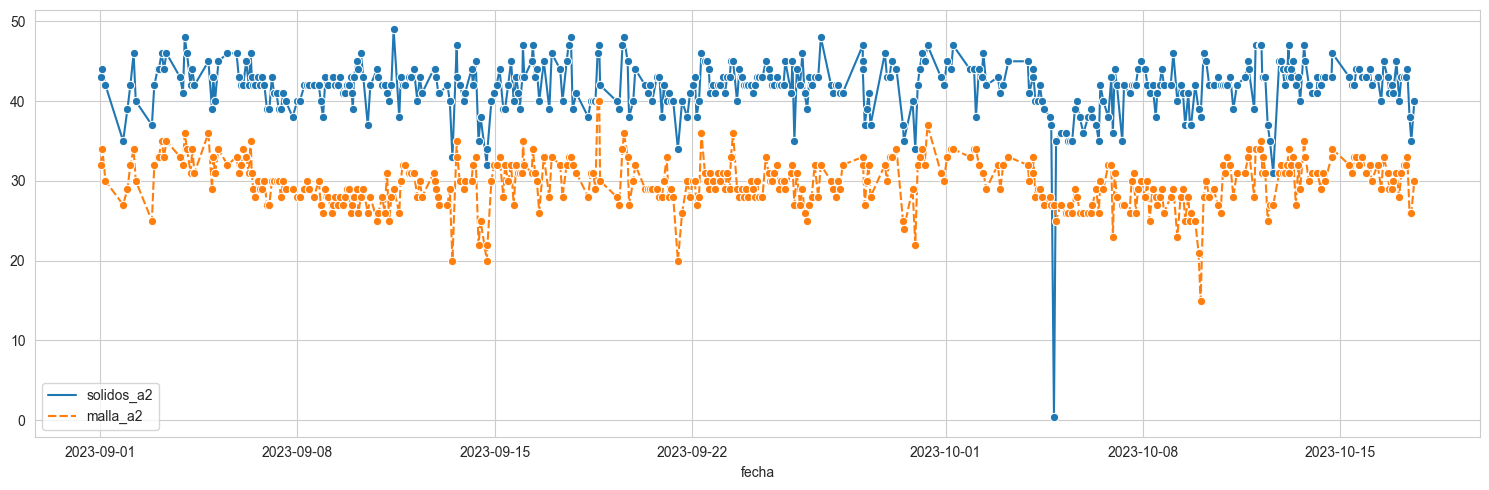

In [145]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,5),tight_layout=True)
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1])
sns.lineplot(df_sm_a2.loc['2023-09':'2023-10'],marker='o')

In [146]:
# Juntar data

# 1 y 2

df_concat_a2 = pd.concat([df_sm_a2,df_a2], axis=0)
df_concat_a1 = pd.concat([df_sm_a1,df_a1], axis=0)
df_concat_a0 = pd.concat([df_sm_a0,df_a0], axis=0)

df_concat_a2 = df_concat_a2[~df_concat_a2.index.duplicated()]
df_concat_a1 = df_concat_a1[~df_concat_a1.index.duplicated()]
df_concat_a0 = df_concat_a0[~df_concat_a0.index.duplicated()]

df_concat_a2 = df_concat_a2.loc['2023-07-01 00:00:00':]
df_concat_a1 = df_concat_a1.loc['2023-07-01 00:00:00':]
df_concat_a0 = df_concat_a0.loc['2023-07-01 00:00:00':]

df_concat_a2 = df_concat_a2[df_concat_a2<100]
df_concat_a1 = df_concat_a1[df_concat_a1<100]
df_concat_a0 = df_concat_a0[df_concat_a0<100]

df_concat_a2 = df_concat_a2[df_concat_a2>5]
df_concat_a1 = df_concat_a1[df_concat_a1>5]
df_concat_a0 = df_concat_a0[df_concat_a0>5]

<Axes: xlabel='fecha'>

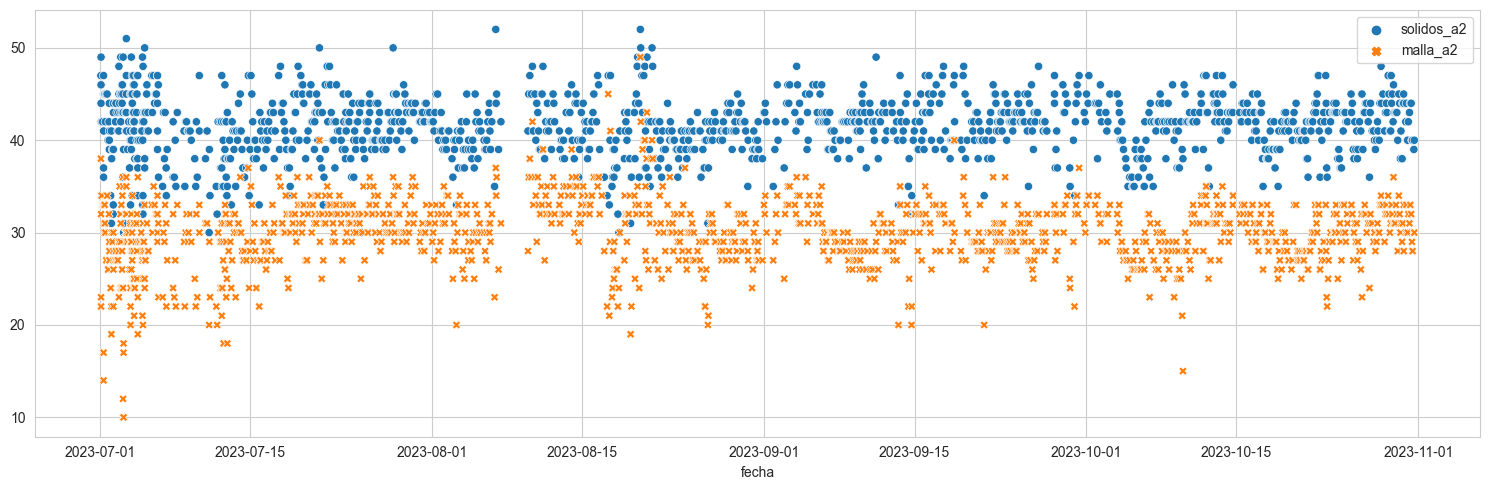

In [147]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,5),tight_layout=True)
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1])
sns.scatterplot(df_concat_a2)

<Axes: xlabel='fecha'>

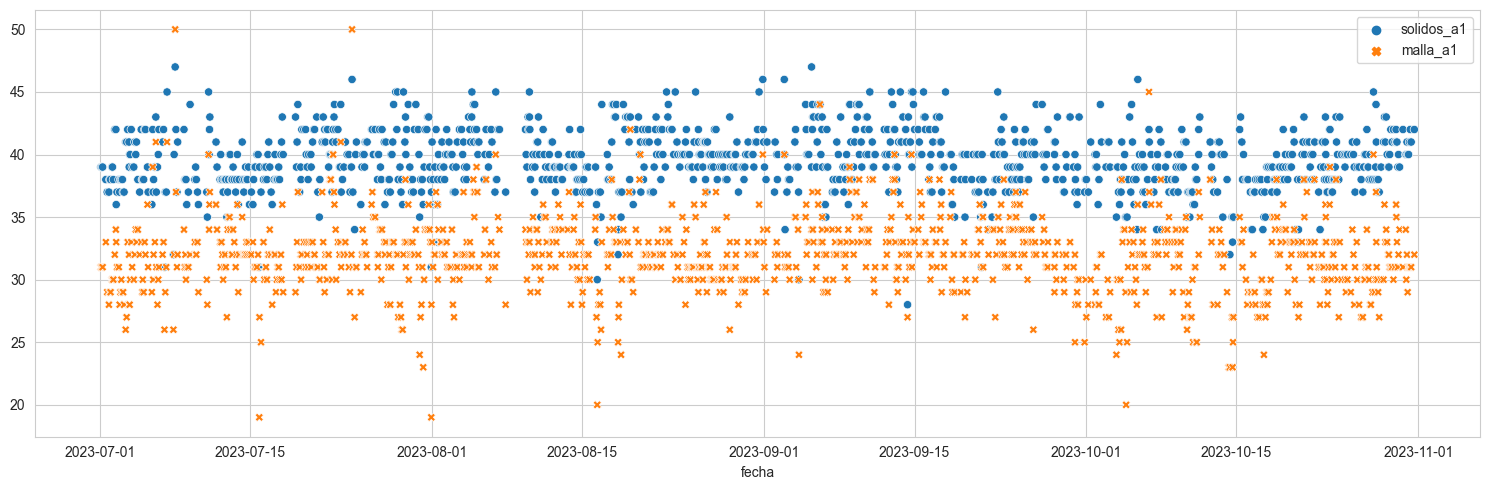

In [148]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,5),tight_layout=True)
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1])
sns.scatterplot(df_concat_a1)

<Axes: xlabel='fecha'>

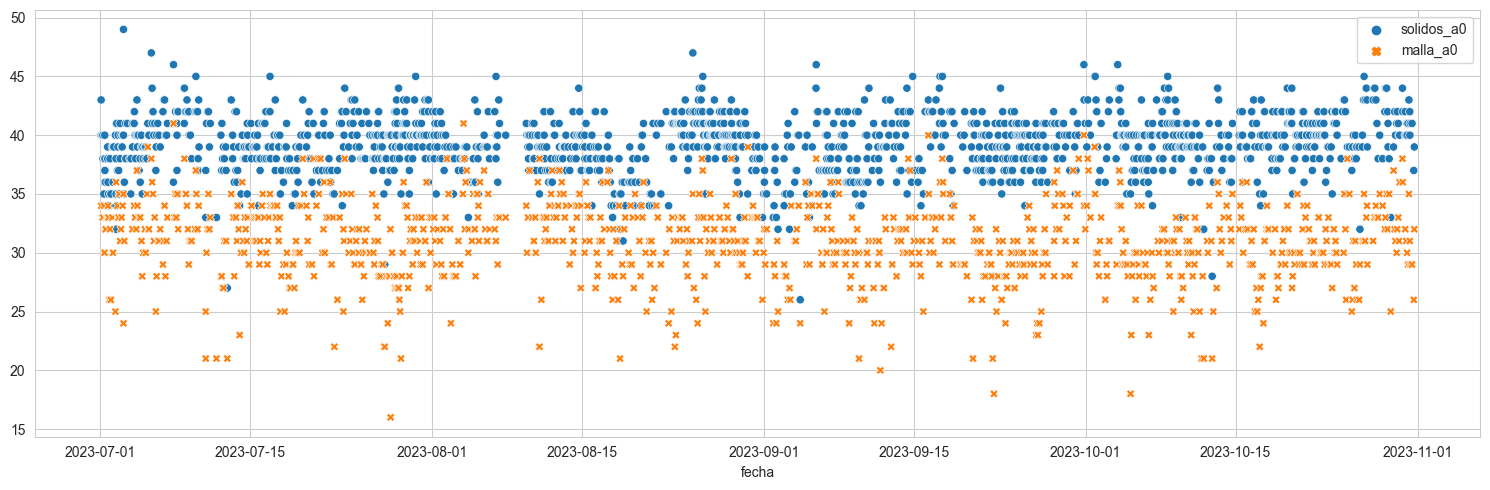

In [149]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,5),tight_layout=True)
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1])
sns.scatterplot(df_concat_a0)

In [150]:
## DATOS DE TRATAMIENTO FRESCO

df_ton = pd.read_csv('dataframe.csv', parse_dates = True , index_col=0, sep =';', date_parser= lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
# Se decide no reemplazar por nan
df_ton = df_ton.replace(['Failed','Error','Bad','I/O Timeout','No Data'],np.nan)
# Se transforma en Número
df_ton = df_ton.apply(pd.to_numeric)


D:\Users\jsegu014\AppData\Local\Temp\ipykernel_17012\3724293367.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_ton = pd.read_csv('dataframe.csv', parse_dates = True , index_col=0, sep =';', date_parser= lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
D:\Users\jsegu014\AppData\Local\Temp\ipykernel_17012\3724293367.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ton = pd.read_csv('dataframe.csv', parse_dates = True , index_col=0, sep =';', date_parser= lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))


In [151]:
#df_ton = df_ton.resample('30m').mean()

# FRECUENCIA

In [152]:
df_concat_a2['delta horas'] = round(df_concat_a2.index.to_series().diff().fillna(pd.Timedelta(0)).apply(lambda x: x.total_seconds() / 3600), 2)
df_concat_a1['delta horas'] = round(df_concat_a1.index.to_series().diff().fillna(pd.Timedelta(0)).apply(lambda x: x.total_seconds() / 3600), 2)
df_concat_a0['delta horas'] = round(df_concat_a0.index.to_series().diff().fillna(pd.Timedelta(0)).apply(lambda x: x.total_seconds() / 3600), 2)

df_concat_a2['mes'] = df_concat_a2.index.month
df_concat_a1['mes'] = df_concat_a1.index.month
df_concat_a0['mes'] = df_concat_a0.index.month

df_concat_a2 = df_concat_a2.loc[(df_concat_a2['delta horas'] < 20) & (df_concat_a2['delta horas'] > 0.16) ]
df_concat_a1 = df_concat_a1.loc[(df_concat_a1['delta horas'] < 20) & (df_concat_a1['delta horas'] > 0.16) ]
df_concat_a0 = df_concat_a0.loc[(df_concat_a0['delta horas'] < 20) & (df_concat_a0['delta horas'] > 0.16) ]



Text(0.5, 1.0, 'Sección A0')

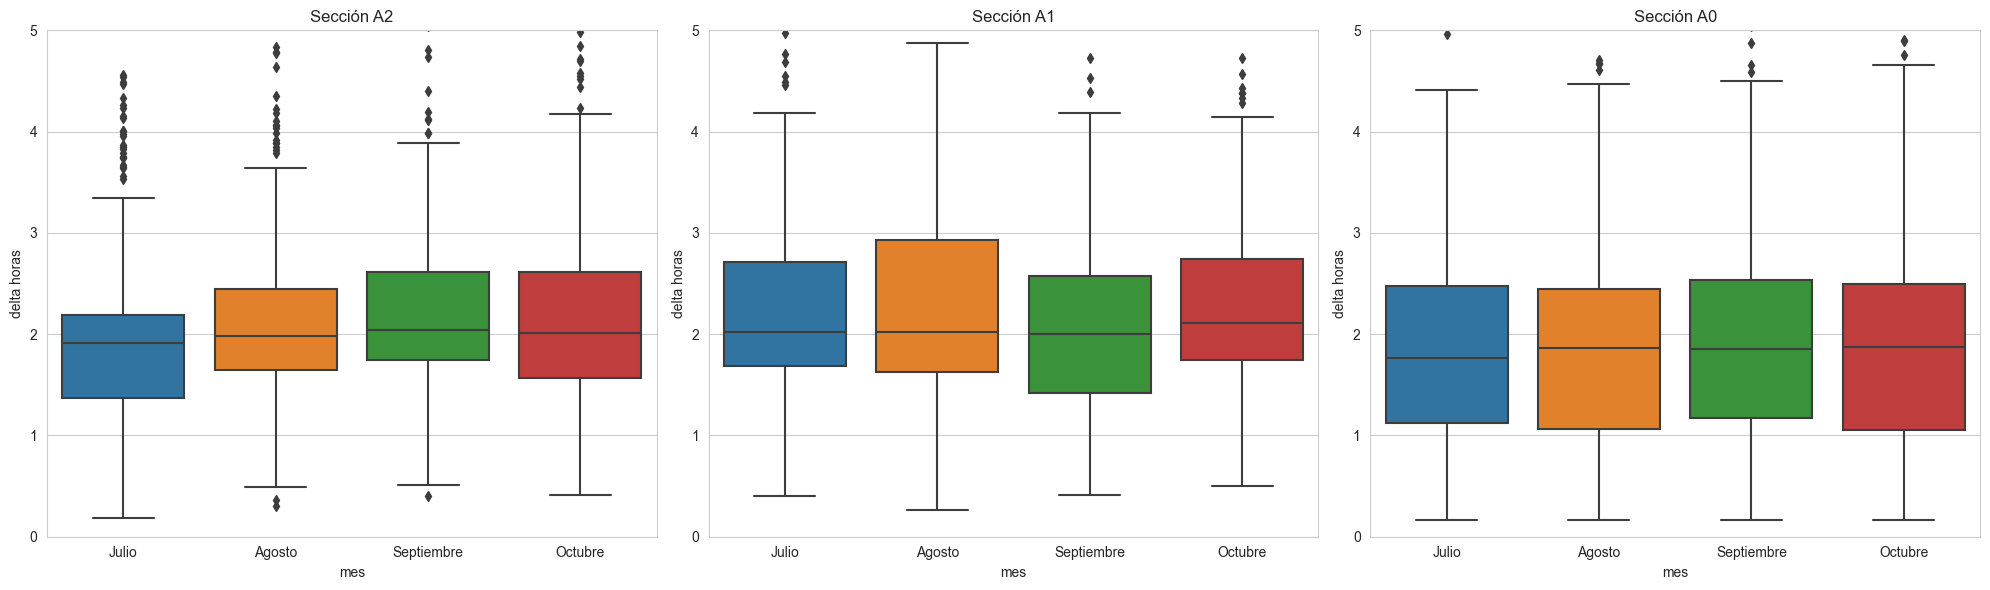

In [153]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,6),tight_layout=True)
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

sns.boxplot(y=df_concat_a2['delta horas'], x = df_concat_a2['mes'], ax=ax0)
sns.boxplot(y=df_concat_a1['delta horas'], x = df_concat_a1['mes'], ax=ax1)
sns.boxplot(y=df_concat_a0['delta horas'], x = df_concat_a0['mes'], ax=ax2)

ax0.set_ylim(0,5)
ax1.set_ylim(0,5)
ax2.set_ylim(0,5)

ax0.set_xticklabels(['Julio', 'Agosto', 'Septiembre', 'Octubre'])
ax1.set_xticklabels(['Julio', 'Agosto', 'Septiembre', 'Octubre'])
ax2.set_xticklabels(['Julio', 'Agosto', 'Septiembre', 'Octubre'])

ax0.set_title('Sección A2')
ax1.set_title('Sección A1')
ax2.set_title('Sección A0')


# Gráficos

Text(0.5, 0.98, 'SEPTIEMBRE 2023')

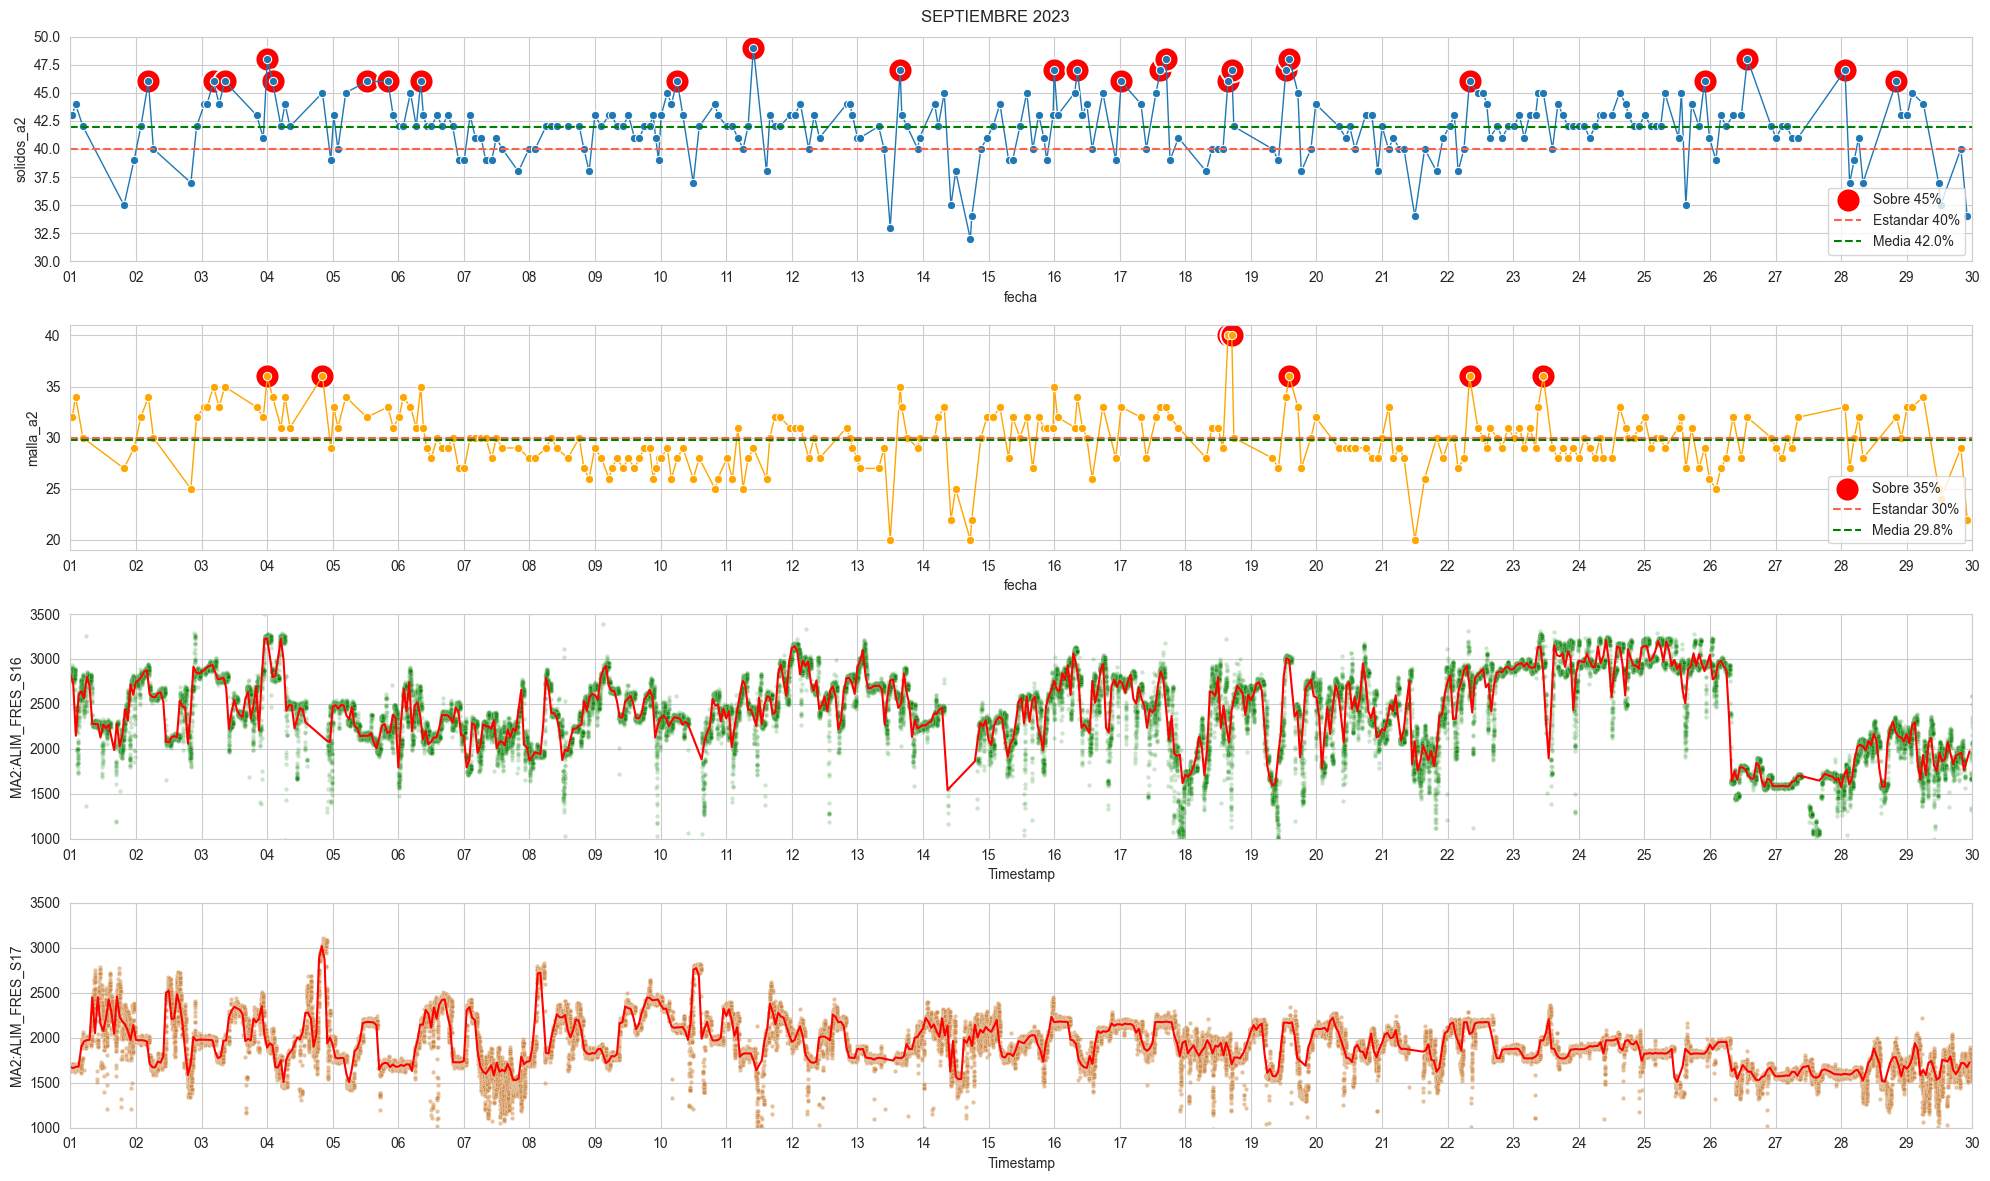

In [154]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,12),tight_layout=True)
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])

#Gráficas para Sólidos
sns.lineplot(df_concat_a2.loc['2023-09-01':'2023-09-29','solidos_a2'],marker='o', lw=1,ax=ax0)
sns.scatterplot(df_concat_a2[df_concat_a2>45].loc['2023-09-01':'2023-09-29','solidos_a2'],color='red',ax=ax0 , s=300 , label= 'Sobre 45%')
ax0.axhline(40, color='tomato', ls='--', label='Estandar 40%')
ax0.axhline(df_concat_a2.loc['2023-09-01':'2023-09-29','solidos_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-09-01':'2023-09-29','solidos_a2'].mean(),1)) + '%')
ax0.legend(loc='lower right')
ax0.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax0.set_ylim(30,50)
ax0.set_xlim(pd.Timestamp('2023-09-01'),pd.Timestamp('2023-09-30'))

#Gráficas para Malla
sns.lineplot(df_concat_a2.loc['2023-09-01':'2023-09-29','malla_a2'],marker='o', lw=1,ax=ax1, color='orange')
sns.scatterplot(df_concat_a2[df_concat_a2>35].loc['2023-09-01':'2023-09-29','malla_a2'],color='red',ax=ax1 , s=300 , label= 'Sobre 35%')
ax1.axhline(30, color='tomato', ls='--', label='Estandar 30%')
ax1.axhline(df_concat_a2.loc['2023-09-01':'2023-09-29','malla_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-09-01':'2023-09-29','malla_a2'].mean(),1)) + '%')
ax1.legend(loc='lower right')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax1.set_ylim(19,41)
ax1.set_xlim(pd.Timestamp('2023-09-01'),pd.Timestamp('2023-09-30'))


#Gráficas para tratamiento
sns.scatterplot(df_ton.loc['2023-09-01':'2023-09-29','MA2:ALIM_FRES_S16'],ax=ax2, color='green', s=10, alpha=0.2)
sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-01':'2023-09-29','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_ylim(1000,3500)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
#sns.lineplot(df_ton.loc['2023-09-01':'2023-10-01','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_xlim(pd.Timestamp('2023-09-01'),pd.Timestamp('2023-09-30'))

sns.scatterplot(df_ton.loc['2023-09-01':'2023-09-29','MA2:ALIM_FRES_S17'],ax=ax3, color='peru', s=10, alpha=0.5)
sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-01':'2023-09-29','MA2:ALIM_FRES_S17'],ax=ax3, color='r')
ax3.set_ylim(1000,3500)
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax3.set_xlim(pd.Timestamp('2023-09-01'),pd.Timestamp('2023-09-30'))

plt.suptitle('SEPTIEMBRE 2023')

In [155]:
df_concat_a2

solidos_a2  malla_a2  delta horas  mes
fecha                                                      
2023-07-01 02:19:39        46.0      32.0         0.31    7
2023-07-01 03:50:45        42.0      34.0         1.47    7
2023-07-01 05:56:43        42.0      33.0         2.10    7
2023-07-01 08:03:17        41.0      14.0         2.11    7
2023-07-01 09:05:23        45.0      30.0         1.01    7
...                         ...       ...          ...  ...
2023-10-31 08:11:08        44.0      32.0         1.97   10
2023-10-31 09:55:30        40.0      29.0         1.74   10
2023-10-31 11:20:13        40.0      28.0         1.41   10
2023-10-31 14:11:28        39.0      30.0         2.85   10
2023-10-31 15:13:54        40.0      30.0         1.04   10

[1222 rows x 4 columns]

In [175]:
print(f"En Septiembre, la malla en la sección A2 estuvo {round((df_concat_a2[df_concat_a2['malla_a2']>35].loc['2023-09-01':'2023-09-30']['malla_a2'].shape[0] / df_concat_a2.loc['2023-09-01':'2023-09-30']['malla_a2'].shape[0])*100,1)}% veces sobre 35%")
print(f"En Septiembre , la malla en la sección A1 estuvo  {df_concat_a1[df_concat_a1['malla_a1']>35].loc['2023-09-01':'2023-09-30']['malla_a1'].shape[0]}  veces sobre 35%")
print(f"En Septiembre  , la malla en la sección A0 estuvo  {df_concat_a0[df_concat_a0['malla_a0']>35].loc['2023-09-01':'2023-09-30']['malla_a0'].shape[0]}  veces sobre 35%")
print('\n')
print(f"En Septiembre, el sólido en la sección A2 estuvo {round((df_concat_a2[df_concat_a2['solidos_a2']>=45].loc['2023-09-01':'2023-09-30']['malla_a2'].shape[0]  / df_concat_a2.loc['2023-09-01':'2023-09-30']['solidos_a2'].shape[0] )*100,1)}% veces sobre 45%")
print(f"En Septiembre , el sólido en la sección A1 estuvo  {df_concat_a1[df_concat_a1['solidos_a1']>=45].loc['2023-09-01':'2023-09-30']['solidos_a1'].shape[0]}  veces sobre 45%")
print(f"En Septiembre  , el sólido en la sección A0 estuvo  {df_concat_a0[df_concat_a0['solidos_a0']>=45].loc['2023-09-01':'2023-09-30']['solidos_a0'].shape[0]}  veces sobre 45%")

En Septiembre, la malla en la sección A2 estuvo 3.1% veces sobre 35%
En Septiembre , la malla en la sección A1 estuvo  36  veces sobre 35%
En Septiembre  , la malla en la sección A0 estuvo  14  veces sobre 35%


En Septiembre, el sólido en la sección A2 estuvo 17.6% veces sobre 45%
En Septiembre , el sólido en la sección A1 estuvo  9  veces sobre 45%
En Septiembre  , el sólido en la sección A0 estuvo  5  veces sobre 45%


In [157]:
print(f"En Octubre, la malla en la sección A2 estuvo {df_concat_a2[df_concat_a2['malla_a2']>=35].loc['2023-10-01':'2023-10-31']['malla_a2'].shape[0]} veces sobre 35%")
print(f"En Octubre , la malla en la sección A1 estuvo  {df_concat_a1[df_concat_a1['malla_a1']>=35].loc['2023-10-01':'2023-10-31']['malla_a1'].shape[0]}  veces sobre 35%")
print(f"En Octubre  , la malla en la sección A0 estuvo  {df_concat_a0[df_concat_a0['malla_a0']>=35].loc['2023-10-01':'2023-10-31']['malla_a0'].shape[0]}  veces sobre 35%")

print('\n')
print(f"En Octubre, el sólido en la sección A2 estuvo {df_concat_a2[df_concat_a2['solidos_a2']>=45].loc['2023-10-01':'2023-10-31']['solidos_a2'].shape[0]} veces sobre 45%")
print(f"En Octubre , el sólido en la sección A1 estuvo  {df_concat_a1[df_concat_a1['solidos_a1']>=45].loc['2023-10-01':'2023-10-31']['solidos_a1'].shape[0]}  veces sobre 45%")
print(f"En Octubre  , el sólido en la sección A0 estuvo  {df_concat_a0[df_concat_a0['solidos_a0']>=45].loc['2023-10-01':'2023-10-31']['solidos_a0'].shape[0]}  veces sobre 45%")

En Octubre, la malla en la sección A2 estuvo 3 veces sobre 35%
En Octubre , la malla en la sección A1 estuvo  31  veces sobre 35%
En Octubre  , la malla en la sección A0 estuvo  24  veces sobre 35%


En Octubre, el sólido en la sección A2 estuvo 38 veces sobre 45%
En Octubre , el sólido en la sección A1 estuvo  2  veces sobre 45%
En Octubre  , el sólido en la sección A0 estuvo  5  veces sobre 45%


## 3 AL 6 DE SEPTIEMBRE 2023

Text(0.5, 0.98, '3 al 6 de SEPTIEMBRE 2023')

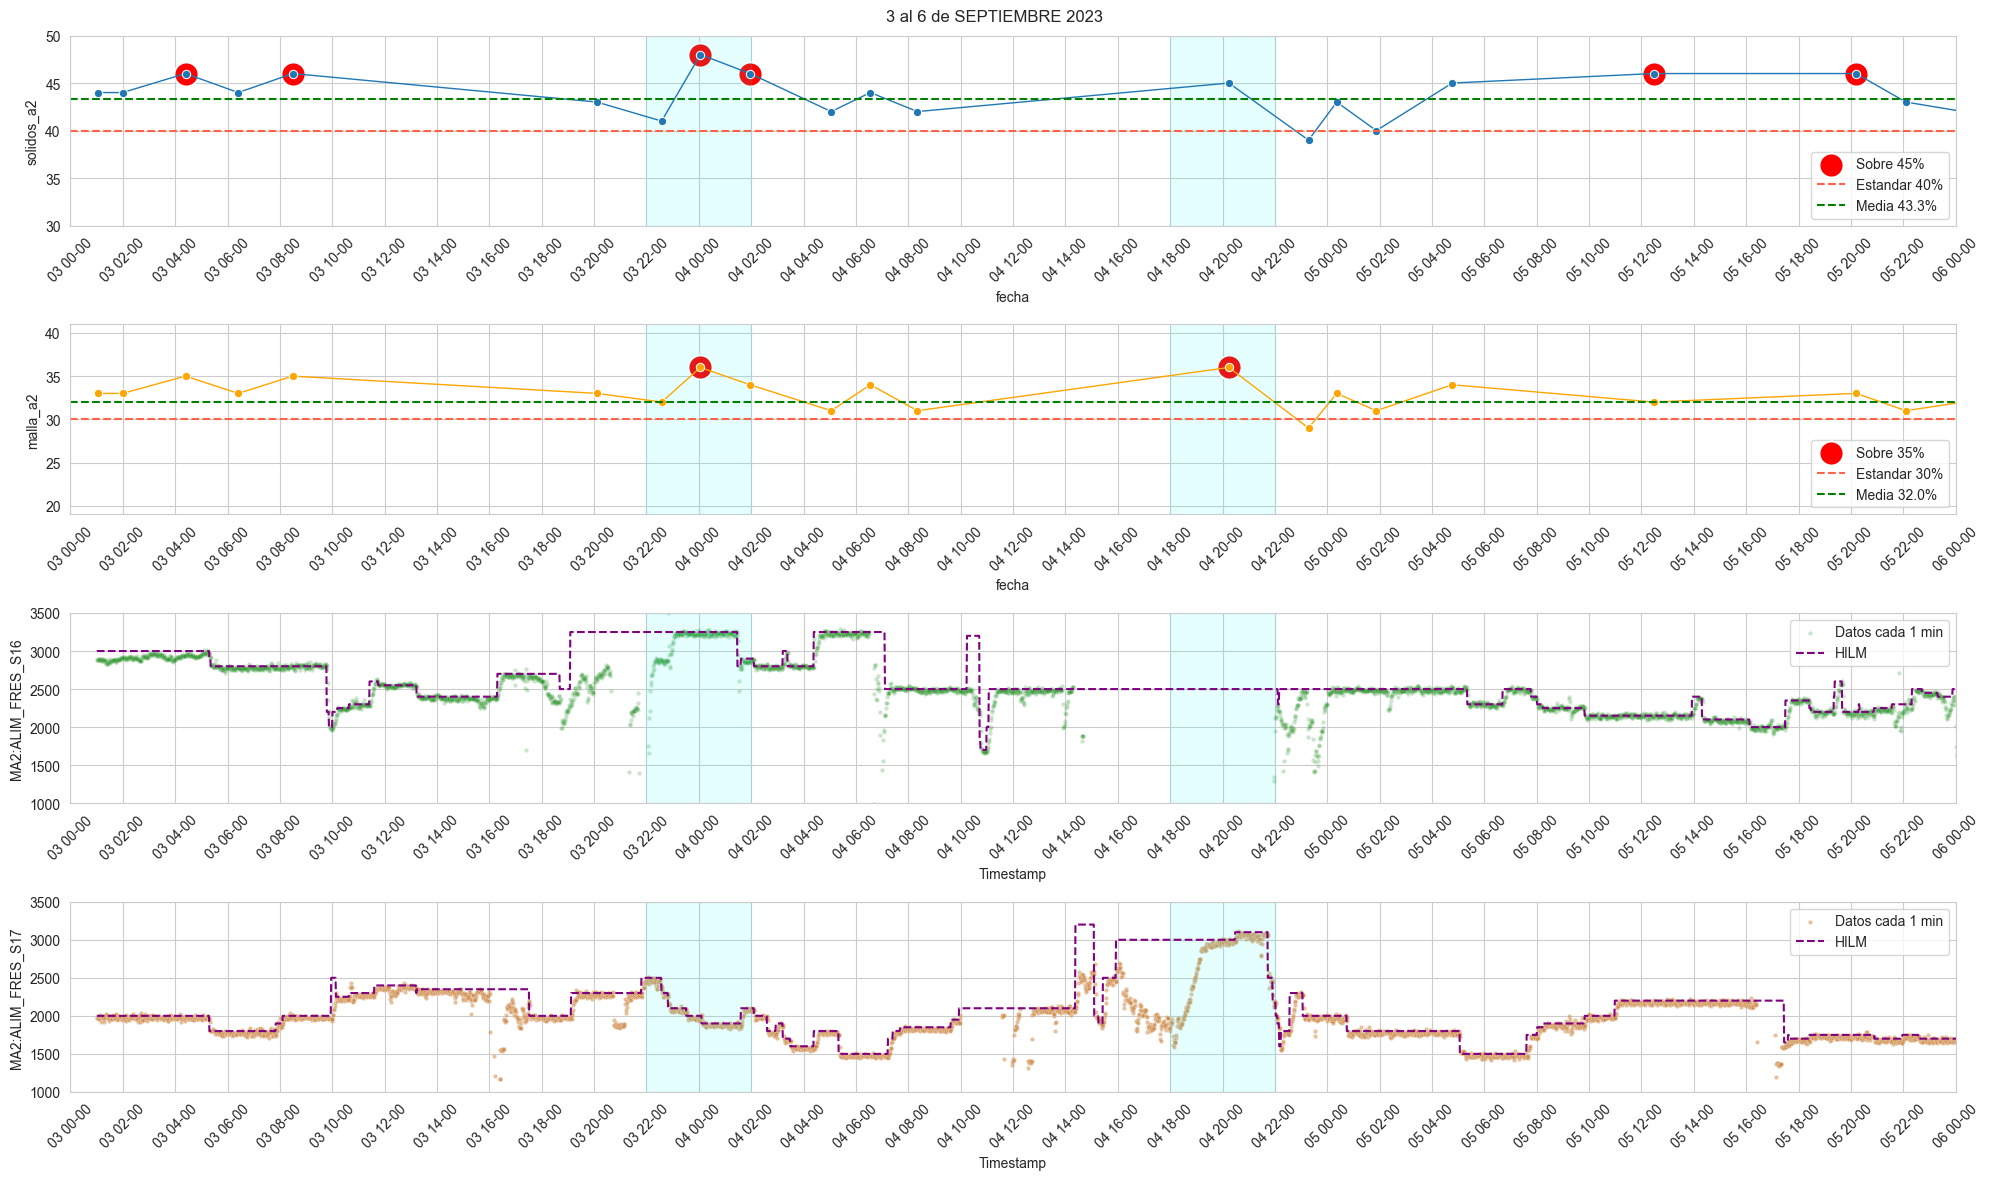

In [158]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,12),tight_layout=True)
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])

#Gráficas para Sólidos
sns.lineplot(df_concat_a2.loc['2023-09-03':'2023-09-06','solidos_a2'],marker='o', lw=1,ax=ax0)
sns.scatterplot(df_concat_a2[df_concat_a2>45].loc['2023-09-03':'2023-09-06','solidos_a2'],color='red',ax=ax0 , s=300 , label= 'Sobre 45%')
ax0.axhline(40, color='tomato', ls='--', label='Estandar 40%')
ax0.axhline(df_concat_a2.loc['2023-09-03':'2023-09-06','solidos_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-09-03':'2023-09-06','solidos_a2'].mean(),1)) + '%')
ax0.legend(loc='lower right')
ax0.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax0.set_ylim(30,50)
ax0.set_xlim(pd.Timestamp('2023-09-03'),pd.Timestamp('2023-09-06'))
plt.setp(ax0.get_xticklabels(), rotation=45)

#Gráficas para Malla
sns.lineplot(df_concat_a2.loc['2023-09-03':'2023-09-06','malla_a2'],marker='o', lw=1,ax=ax1, color='orange')
sns.scatterplot(df_concat_a2[df_concat_a2>35].loc['2023-09-03':'2023-09-06','malla_a2'],color='red',ax=ax1 , s=300 , label= 'Sobre 35%')
ax1.axhline(30, color='tomato', ls='--', label='Estandar 30%')
ax1.axhline(df_concat_a2.loc['2023-09-03':'2023-09-06','malla_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-09-03':'2023-09-06','malla_a2'].mean(),1)) + '%')
ax1.legend(loc='lower right')
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax1.set_ylim(19,41)
ax1.set_xlim(pd.Timestamp('2023-09-03'),pd.Timestamp('2023-09-06'))
plt.setp(ax1.get_xticklabels(), rotation=45)


#Gráficas para tratamiento
sns.scatterplot(df_ton.loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S16'],ax=ax2, color='green', s=10, alpha=0.2, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S16'],ax=ax2, color='r', ls='--', label='Media cada 1 hora')
ax2.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-09-03':'2023-09-06','MA2:3WIC110.SPHILM'],ax=ax2, color='purple', ls='--', label='HILM')
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
#sns.lineplot(df_ton.loc['2023-09-01':'2023-10-01','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_xlim(pd.Timestamp('2023-09-03'),pd.Timestamp('2023-09-06'))
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.legend()

sns.scatterplot(df_ton.loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S17'],ax=ax3, color='peru', s=10, alpha=0.5, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S17'],ax=ax3, color='r', ls='--', label='Media cada 1 hora')
ax3.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-09-03':'2023-09-06','MA2:3WIC210.SPHILM'],ax=ax3, color='purple', ls='--', label='HILM')
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax3.set_xlim(pd.Timestamp('2023-09-03'),pd.Timestamp('2023-09-06'))
plt.setp(ax3.get_xticklabels(), rotation=45)
ax3.legend()

ax0.axvspan('2023-09-03 22:00:00','2023-09-04 02:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-09-03 22:00:00','2023-09-04 02:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-09-03 22:00:00','2023-09-04 02:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-09-03 22:00:00','2023-09-04 02:00:00' , color = 'cyan', alpha= 0.1)

ax0.axvspan('2023-09-04 18:00:00','2023-09-04 22:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-09-04 18:00:00','2023-09-04 22:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-09-04 18:00:00','2023-09-04 22:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-09-04 18:00:00','2023-09-04 22:00:00' , color = 'cyan', alpha= 0.1)

plt.suptitle('3 al 6 de SEPTIEMBRE 2023')

Text(0.5, 0.98, '18 al 20 de SEPTIEMBRE 2023')

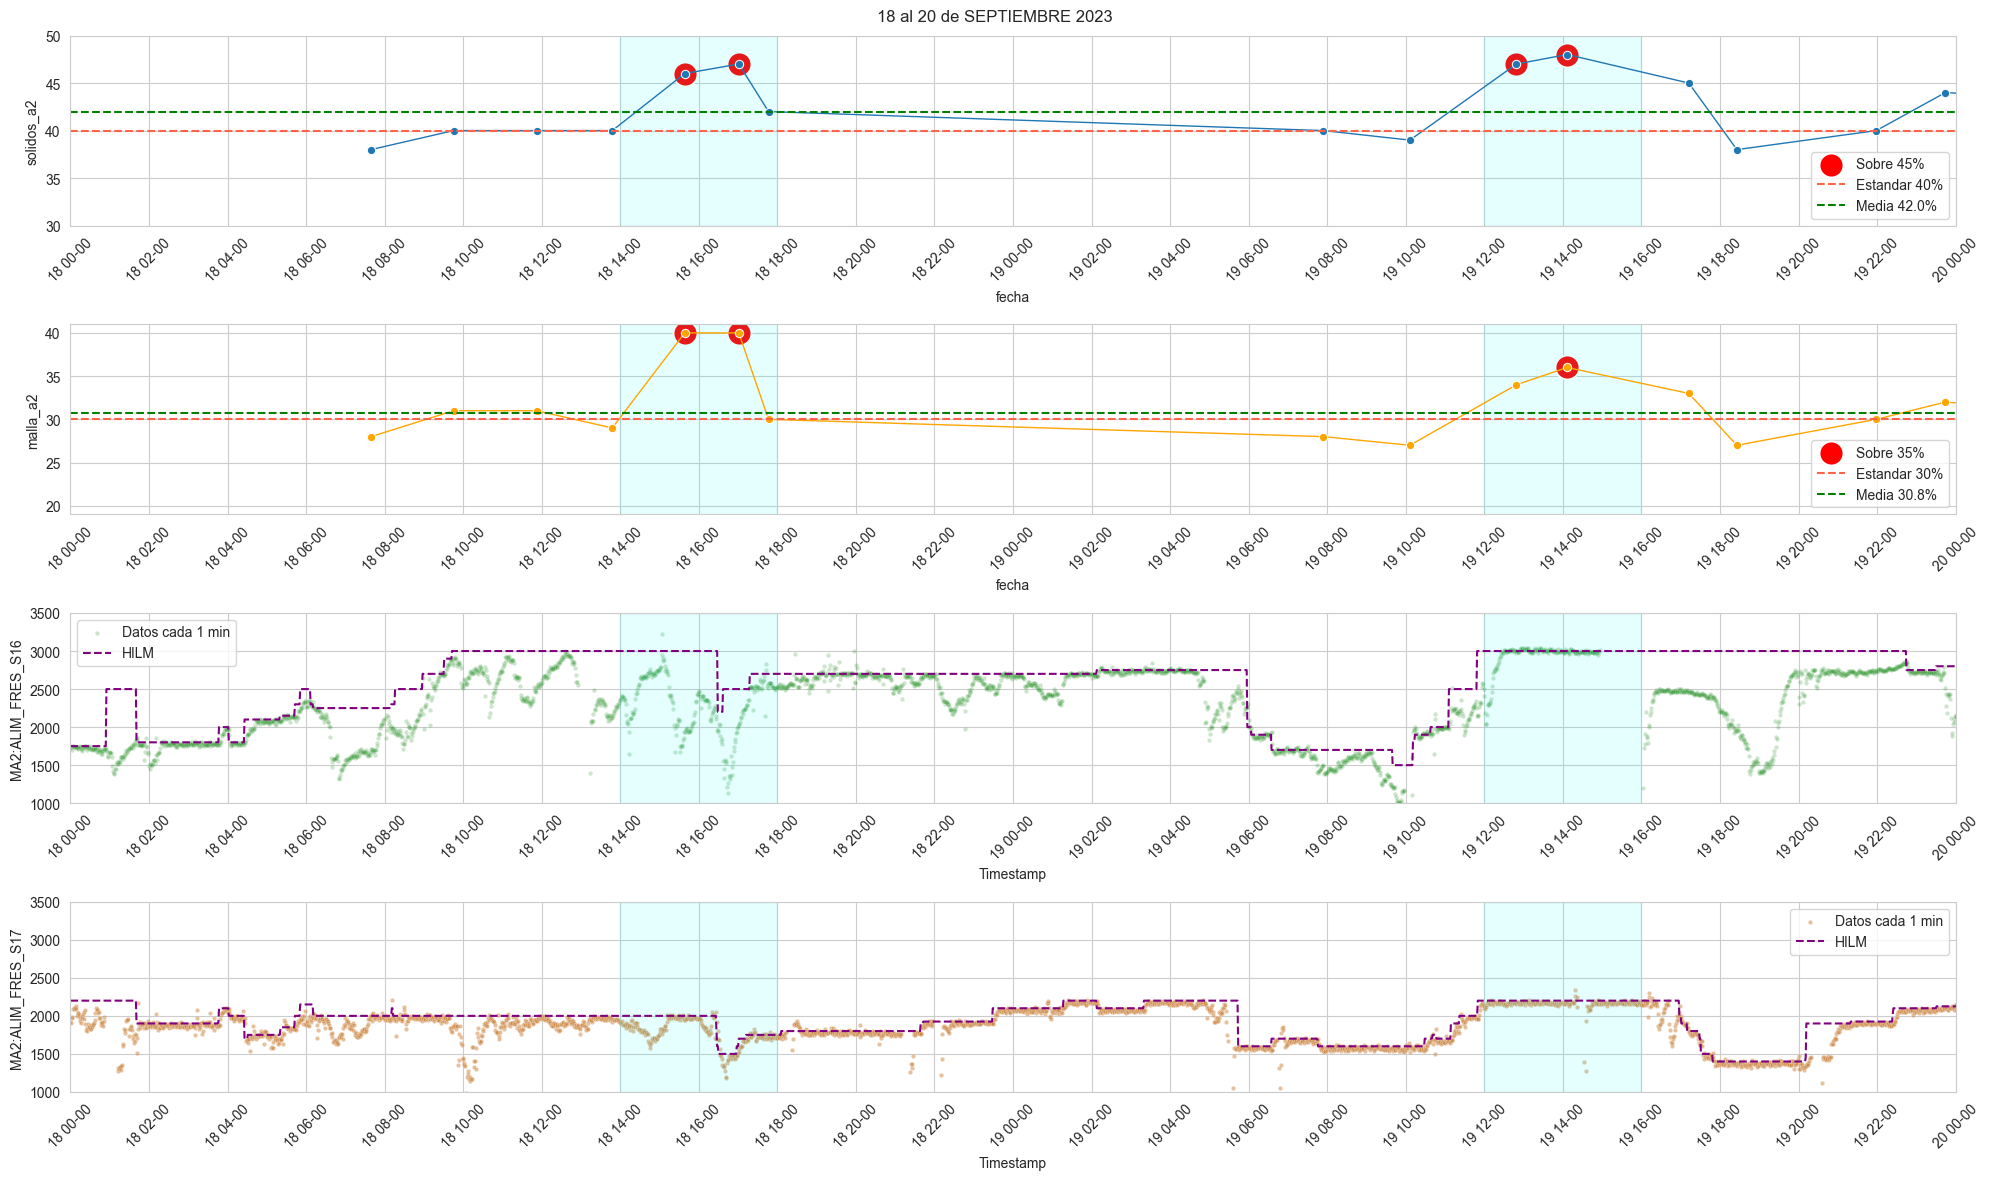

In [159]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,12),tight_layout=True)
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])

#Gráficas para Sólidos
sns.lineplot(df_concat_a2.loc['2023-09-18':'2023-09-20','solidos_a2'],marker='o', lw=1,ax=ax0)
sns.scatterplot(df_concat_a2[df_concat_a2>45].loc['2023-09-18':'2023-09-20','solidos_a2'],color='red',ax=ax0 , s=300 , label= 'Sobre 45%')
ax0.axhline(40, color='tomato', ls='--', label='Estandar 40%')
ax0.axhline(df_concat_a2.loc['2023-09-18':'2023-09-20','solidos_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-09-18':'2023-09-20','solidos_a2'].mean(),1)) + '%')
ax0.legend(loc='lower right')
ax0.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax0.set_ylim(30,50)
ax0.set_xlim(pd.Timestamp('2023-09-18'),pd.Timestamp('2023-09-20'))
plt.setp(ax0.get_xticklabels(), rotation=45)

#Gráficas para Malla
sns.lineplot(df_concat_a2.loc['2023-09-18':'2023-09-20','malla_a2'],marker='o', lw=1,ax=ax1, color='orange')
sns.scatterplot(df_concat_a2[df_concat_a2>35].loc['2023-09-18':'2023-09-20','malla_a2'],color='red',ax=ax1 , s=300 , label= 'Sobre 35%')
ax1.axhline(30, color='tomato', ls='--', label='Estandar 30%')
ax1.axhline(df_concat_a2.loc['2023-09-18':'2023-09-20','malla_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-09-18':'2023-09-20','malla_a2'].mean(),1)) + '%')
ax1.legend(loc='lower right')
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax1.set_ylim(19,41)
ax1.set_xlim(pd.Timestamp('2023-09-18'),pd.Timestamp('2023-09-20'))
plt.setp(ax1.get_xticklabels(), rotation=45)


#Gráficas para tratamiento
sns.scatterplot(df_ton.loc['2023-09-18':'2023-09-20','MA2:ALIM_FRES_S16'],ax=ax2, color='green', s=10, alpha=0.2, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S16'],ax=ax2, color='r', ls='--', label='Media cada 1 hora')
ax2.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-09-18':'2023-09-20','MA2:3WIC110.SPHILM'],ax=ax2, color='purple', ls='--', label='HILM')
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
#sns.lineplot(df_ton.loc['2023-09-01':'2023-10-01','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_xlim(pd.Timestamp('2023-09-18'),pd.Timestamp('2023-09-20'))
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.legend()

sns.scatterplot(df_ton.loc['2023-09-18':'2023-09-20','MA2:ALIM_FRES_S17'],ax=ax3, color='peru', s=10, alpha=0.5, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S17'],ax=ax3, color='r', ls='--', label='Media cada 1 hora')
ax3.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-09-18':'2023-09-20','MA2:3WIC210.SPHILM'],ax=ax3, color='purple', ls='--', label='HILM')
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax3.set_xlim(pd.Timestamp('2023-09-18'),pd.Timestamp('2023-09-20'))
plt.setp(ax3.get_xticklabels(), rotation=45)
ax3.legend()

ax0.axvspan('2023-09-18 14:00:00','2023-09-18 18:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-09-18 14:00:00','2023-09-18 18:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-09-18 14:00:00','2023-09-18 18:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-09-18 14:00:00','2023-09-18 18:00:00' , color = 'cyan', alpha= 0.1)

ax0.axvspan('2023-09-19 12:00:00','2023-09-19 16:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-09-19 12:00:00','2023-09-19 16:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-09-19 12:00:00','2023-09-19 16:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-09-19 12:00:00','2023-09-19 16:00:00' , color = 'cyan', alpha= 0.1)

plt.suptitle('18 al 20 de SEPTIEMBRE 2023')

# OCTUBRE

Text(0.5, 0.98, 'OCTUBRE 2023')

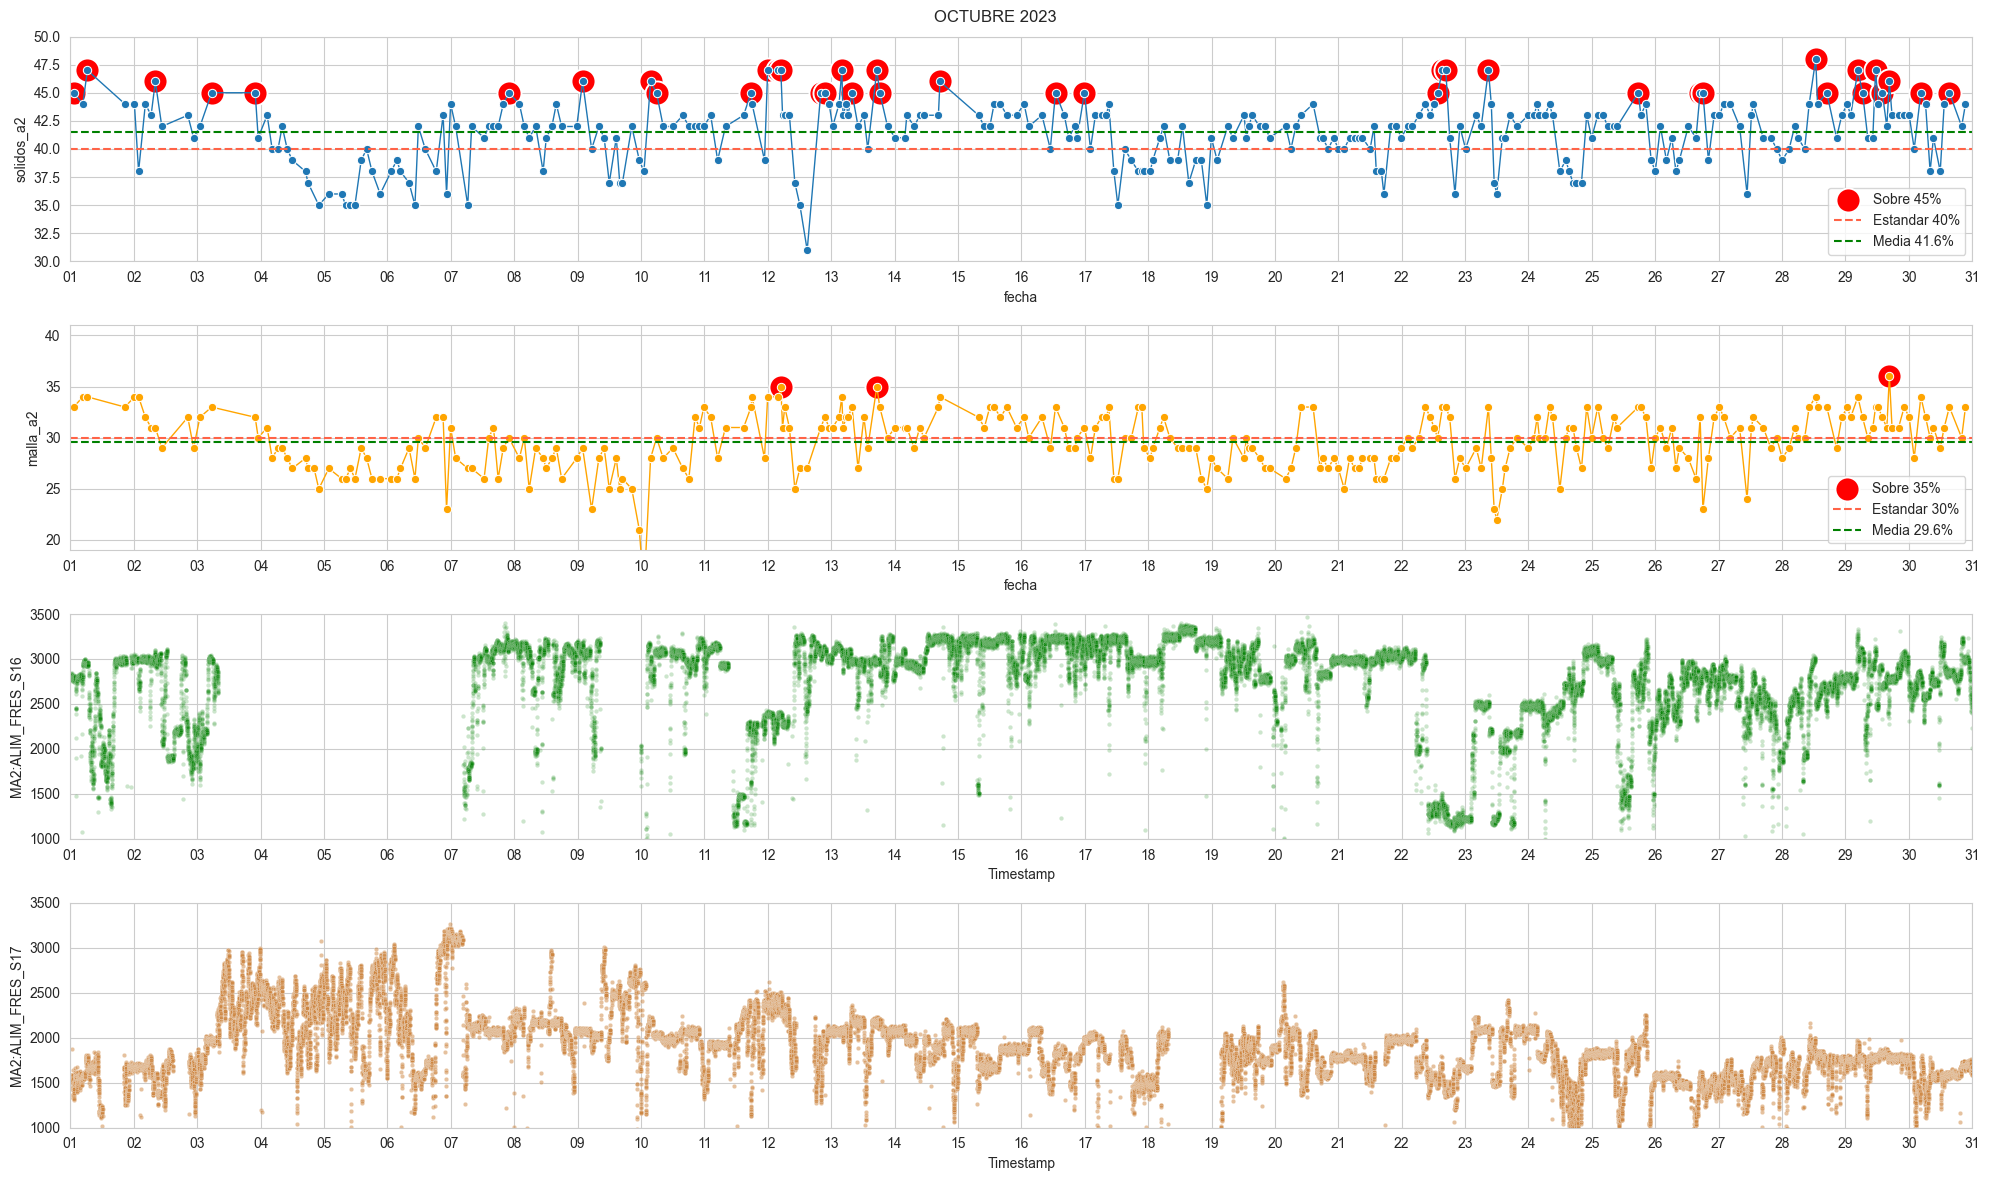

In [160]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,12),tight_layout=True)
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])

#Gráficas para Sólidos
sns.lineplot(df_concat_a2.loc['2023-10-01':'2023-10-30','solidos_a2'],marker='o', lw=1,ax=ax0)
sns.scatterplot(df_concat_a2[df_concat_a2>=45].loc['2023-10-01':'2023-10-30','solidos_a2'],color='red',ax=ax0 , s=300 , label= 'Sobre 45%')
ax0.axhline(40, color='tomato', ls='--', label='Estandar 40%')
ax0.axhline(df_concat_a2.loc['2023-10-01':'2023-10-30','solidos_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-10-01':'2023-10-30','solidos_a2'].mean(),1)) + '%')
ax0.legend(loc='lower right')
ax0.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax0.set_ylim(30,50)
ax0.set_xlim(pd.Timestamp('2023-10-01'),pd.Timestamp('2023-10-31'))

#Gráficas para Malla
sns.lineplot(df_concat_a2.loc['2023-10-01':'2023-10-30','malla_a2'],marker='o', lw=1,ax=ax1, color='orange')
sns.scatterplot(df_concat_a2[df_concat_a2>=35].loc['2023-10-01':'2023-10-30','malla_a2'],color='red',ax=ax1 , s=300 , label= 'Sobre 35%')
ax1.axhline(30, color='tomato', ls='--', label='Estandar 30%')
ax1.axhline(df_concat_a2.loc['2023-10-01':'2023-10-30','malla_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-10-01':'2023-10-30','malla_a2'].mean(),1)) + '%')
ax1.legend(loc='lower right')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax1.set_ylim(19,41)
ax1.set_xlim(pd.Timestamp('2023-10-01'),pd.Timestamp('2023-10-31'))


#Gráficas para tratamiento
sns.scatterplot(df_ton.loc['2023-10-01':'2023-10-30','MA2:ALIM_FRES_S16'],ax=ax2, color='green', s=10, alpha=0.2)
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-10-01':'2023-10-30','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_ylim(1000,3500)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
#sns.lineplot(df_ton.loc['2023-09-01':'2023-10-01','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_xlim(pd.Timestamp('2023-10-01'),pd.Timestamp('2023-10-31'))

sns.scatterplot(df_ton.loc['2023-10-01':'2023-10-30','MA2:ALIM_FRES_S17'],ax=ax3, color='peru', s=10, alpha=0.5)
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-10-01':'2023-10-30','MA2:ALIM_FRES_S17'],ax=ax3, color='r')
ax3.set_ylim(1000,3500)
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Marcar cada día
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax3.set_xlim(pd.Timestamp('2023-10-01'),pd.Timestamp('2023-10-31'))

plt.suptitle('OCTUBRE 2023')

Text(0.5, 0.98, '12 al 14 de OCTUBRE 2023')

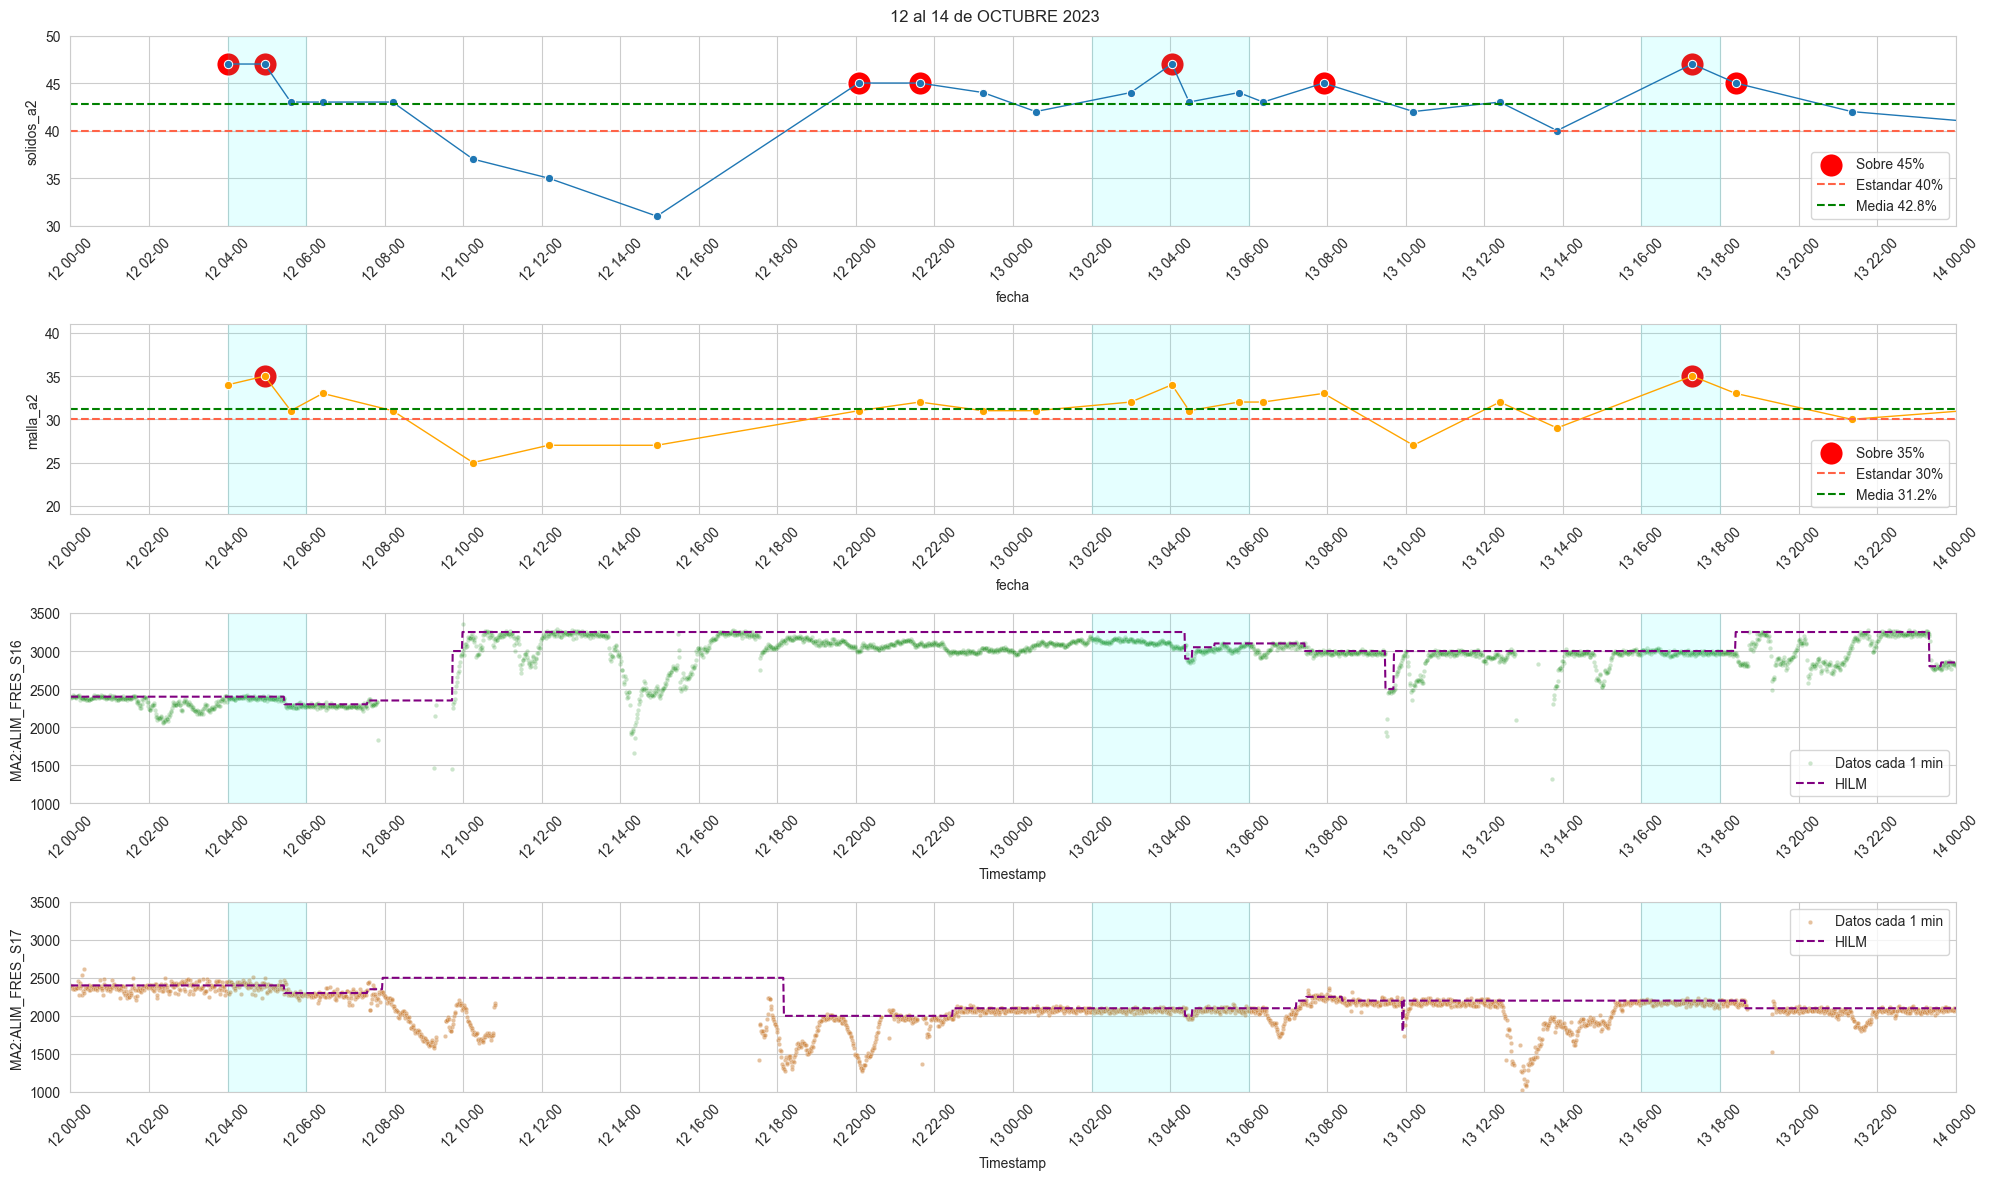

In [161]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,12),tight_layout=True)
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])

#Gráficas para Sólidos
sns.lineplot(df_concat_a2.loc['2023-10-12':'2023-10-14','solidos_a2'],marker='o', lw=1,ax=ax0)
sns.scatterplot(df_concat_a2[df_concat_a2>=45].loc['2023-10-12':'2023-10-14','solidos_a2'],color='red',ax=ax0 , s=300 , label= 'Sobre 45%')
ax0.axhline(40, color='tomato', ls='--', label='Estandar 40%')
ax0.axhline(df_concat_a2.loc['2023-10-12':'2023-10-14','solidos_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-10-12':'2023-10-14','solidos_a2'].mean(),1)) + '%')
ax0.legend(loc='lower right')
ax0.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax0.set_ylim(30,50)
ax0.set_xlim(pd.Timestamp('2023-10-12'),pd.Timestamp('2023-10-14'))
plt.setp(ax0.get_xticklabels(), rotation=45)

#Gráficas para Malla
sns.lineplot(df_concat_a2.loc['2023-10-12':'2023-10-14','malla_a2'],marker='o', lw=1,ax=ax1, color='orange')
sns.scatterplot(df_concat_a2[df_concat_a2>=35].loc['2023-10-12':'2023-10-14','malla_a2'],color='red',ax=ax1 , s=300 , label= 'Sobre 35%')
ax1.axhline(30, color='tomato', ls='--', label='Estandar 30%')
ax1.axhline(df_concat_a2.loc['2023-10-12':'2023-10-14','malla_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-10-12':'2023-10-14','malla_a2'].mean(),1)) + '%')
ax1.legend(loc='lower right')
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax1.set_ylim(19,41)
ax1.set_xlim(pd.Timestamp('2023-10-12'),pd.Timestamp('2023-10-14'))
plt.setp(ax1.get_xticklabels(), rotation=45)


#Gráficas para tratamiento
sns.scatterplot(df_ton.loc['2023-10-12':'2023-10-14','MA2:ALIM_FRES_S16'],ax=ax2, color='green', s=10, alpha=0.2, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S16'],ax=ax2, color='r', ls='--', label='Media cada 1 hora')
ax2.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-10-12':'2023-10-14','MA2:3WIC110.SPHILM'],ax=ax2, color='purple', ls='--', label='HILM')
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
#sns.lineplot(df_ton.loc['2023-09-01':'2023-10-01','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_xlim(pd.Timestamp('2023-10-12'),pd.Timestamp('2023-10-14'))
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.legend()

sns.scatterplot(df_ton.loc['2023-10-12':'2023-10-14','MA2:ALIM_FRES_S17'],ax=ax3, color='peru', s=10, alpha=0.5, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S17'],ax=ax3, color='r', ls='--', label='Media cada 1 hora')
ax3.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-10-12':'2023-10-14','MA2:3WIC210.SPHILM'],ax=ax3, color='purple', ls='--', label='HILM')
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax3.set_xlim(pd.Timestamp('2023-10-12'),pd.Timestamp('2023-10-14'))
plt.setp(ax3.get_xticklabels(), rotation=45)
ax3.legend()

ax0.axvspan('2023-10-12 04:00:00','2023-10-12 06:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-10-12 04:00:00','2023-10-12 06:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-10-12 04:00:00','2023-10-12 06:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-10-12 04:00:00','2023-10-12 06:00:00' , color = 'cyan', alpha= 0.1)


ax0.axvspan('2023-10-13 02:00:00','2023-10-13 06:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-10-13 02:00:00','2023-10-13 06:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-10-13 02:00:00','2023-10-13 06:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-10-13 02:00:00','2023-10-13 06:00:00' , color = 'cyan', alpha= 0.1)

ax0.axvspan('2023-10-13 16:00:00','2023-10-13 18:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-10-13 16:00:00','2023-10-13 18:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-10-13 16:00:00','2023-10-13 18:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-10-13 16:00:00','2023-10-13 18:00:00' , color = 'cyan', alpha= 0.1)



plt.suptitle('12 al 14 de OCTUBRE 2023')

Text(0.5, 0.98, '29 al 31 de OCTUBRE 2023')

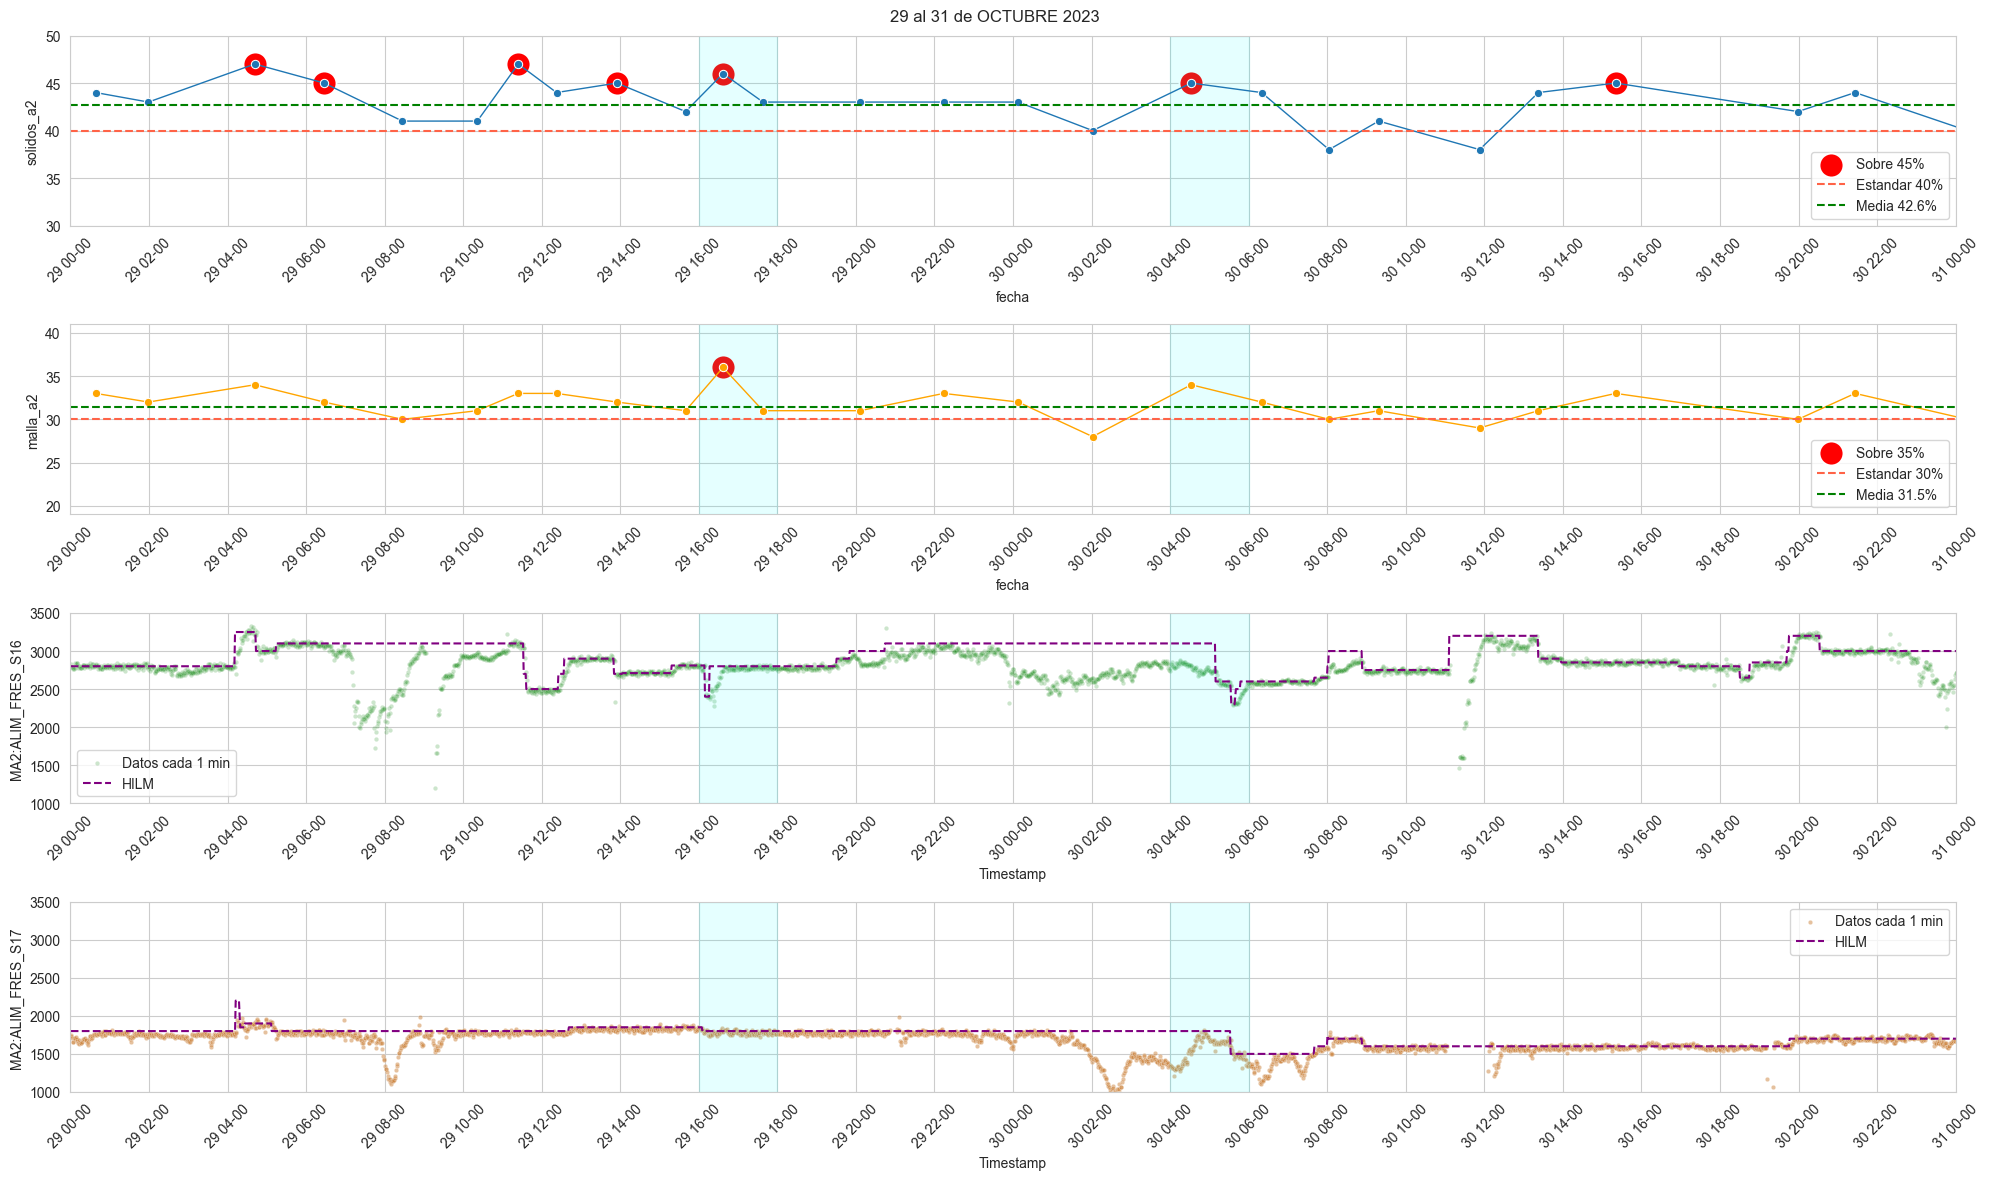

In [162]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,12),tight_layout=True)
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])

#Gráficas para Sólidos
sns.lineplot(df_concat_a2.loc['2023-10-29':'2023-10-31','solidos_a2'],marker='o', lw=1,ax=ax0)
sns.scatterplot(df_concat_a2[df_concat_a2>=45].loc['2023-10-29':'2023-10-31','solidos_a2'],color='red',ax=ax0 , s=300 , label= 'Sobre 45%')
ax0.axhline(40, color='tomato', ls='--', label='Estandar 40%')
ax0.axhline(df_concat_a2.loc['2023-10-29':'2023-10-31','solidos_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-10-29':'2023-10-31','solidos_a2'].mean(),1)) + '%')
ax0.legend(loc='lower right')
ax0.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax0.set_ylim(30,50)
ax0.set_xlim(pd.Timestamp('2023-10-29'),pd.Timestamp('2023-10-31'))
plt.setp(ax0.get_xticklabels(), rotation=45)

#Gráficas para Malla
sns.lineplot(df_concat_a2.loc['2023-10-29':'2023-10-31','malla_a2'],marker='o', lw=1,ax=ax1, color='orange')
sns.scatterplot(df_concat_a2[df_concat_a2>=35].loc['2023-10-29':'2023-10-31','malla_a2'],color='red',ax=ax1 , s=300 , label= 'Sobre 35%')
ax1.axhline(30, color='tomato', ls='--', label='Estandar 30%')
ax1.axhline(df_concat_a2.loc['2023-10-29':'2023-10-31','malla_a2'].mean(), color='g', ls='--', label='Media ' + str(round(df_concat_a2.loc['2023-10-29':'2023-10-31','malla_a2'].mean(),1)) + '%')
ax1.legend(loc='lower right')
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax1.set_ylim(19,41)
ax1.set_xlim(pd.Timestamp('2023-10-29'),pd.Timestamp('2023-10-31'))
plt.setp(ax1.get_xticklabels(), rotation=45)


#Gráficas para tratamiento
sns.scatterplot(df_ton.loc['2023-10-29':'2023-10-31','MA2:ALIM_FRES_S16'],ax=ax2, color='green', s=10, alpha=0.2, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S16'],ax=ax2, color='r', ls='--', label='Media cada 1 hora')
ax2.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-10-29':'2023-10-31','MA2:3WIC110.SPHILM'],ax=ax2, color='purple', ls='--', label='HILM')
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
#sns.lineplot(df_ton.loc['2023-09-01':'2023-10-01','MA2:ALIM_FRES_S16'],ax=ax2, color='r')
ax2.set_xlim(pd.Timestamp('2023-10-29'),pd.Timestamp('2023-10-31'))
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.legend()

sns.scatterplot(df_ton.loc['2023-10-29':'2023-10-31','MA2:ALIM_FRES_S17'],ax=ax3, color='peru', s=10, alpha=0.5, label = 'Datos cada 1 min')
#sns.lineplot(df_ton[df_ton>1500].resample('1h').mean().loc['2023-09-03':'2023-09-06','MA2:ALIM_FRES_S17'],ax=ax3, color='r', ls='--', label='Media cada 1 hora')
ax3.set_ylim(1000,3500)
sns.lineplot(df_ton.loc['2023-10-29':'2023-10-31','MA2:3WIC210.SPHILM'],ax=ax3, color='purple', ls='--', label='HILM')
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=2)) # Marcar cada día
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d %H-%M'))
ax3.set_xlim(pd.Timestamp('2023-10-29'),pd.Timestamp('2023-10-31'))
plt.setp(ax3.get_xticklabels(), rotation=45)
ax3.legend()

ax0.axvspan('2023-10-30 04:00:00','2023-10-30 06:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-10-30 04:00:00','2023-10-30 06:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-10-30 04:00:00','2023-10-30 06:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-10-30 04:00:00','2023-10-30 06:00:00' , color = 'cyan', alpha= 0.1)

ax0.axvspan('2023-10-29 16:00:00','2023-10-29 18:00:00' , color = 'cyan', alpha= 0.1)
ax1.axvspan('2023-10-29 16:00:00','2023-10-29 18:00:00' , color = 'cyan', alpha= 0.1)
ax2.axvspan('2023-10-29 16:00:00','2023-10-29 18:00:00' , color = 'cyan', alpha= 0.1)
ax3.axvspan('2023-10-29 16:00:00','2023-10-29 18:00:00' , color = 'cyan', alpha= 0.1)




plt.suptitle('29 al 31 de OCTUBRE 2023')